In [1]:
import pandas as pd
print(pd.__version__)

import numpy as np

0.19.2


# Organizing data

Topics we will discuss in this lesson are closely related to database management. The concept of *tidy data* was introduced by Hadley Wickham (Chief scientist in **R** project) and was inspired by databases. It turns out that scientists and statisticians can benifit very much from the same concepts. In particular, structuring your data in a tidy way will facilitate any type of analysis you want to do.

The core ideas in this lesson are taken from Hadley Wickham's seminal paper "Tidy data" [1], which IMO every person who works with complex datasets should read. Some examples in this notebook are from that paper, while others I made up myself.

[1] Wickham, H. (2014). Tidy data. Journal of Statistical Software, 59(10), 1-23.

# Tidying: structuring datasets to facilitate analysis

The principles of tidy data provide a standard way to organize data values within a dataset. Current tools often require translation: you have to spend time munging the output from one tool so you can input it into another. Tidy datasets and tools for them work hand in hand to make data analysis easier, allowing you to focus on the interesting domain problem, not on the uninteresting logistics of data.

Let's start with an example.

Consider the following 2 ways of presenting the same toy data. Think about whether there is any difference how we organize it.

In [2]:
untidy = pd.DataFrame({'treatment_a':[np.nan, 16, 3],'treatment_b':[2,11,1]}, 
                      index=['John Smith', 'Jane Doe','Mary Johnson'])
untidy

,treatment_a,treatment_b
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [3]:
untidy.T

,John Smith,Jane Doe,Mary Johnson
treatment_a,NaN,16.0,3.0
treatment_b,2.0,11.0,1.0


A dataset is a collection of values, usually either numbers (if quantitative) or strings (if
qualitative). Values are organized in two ways. Every value belongs to a variable and an
observation. **A variable contains all values that measure the same underlying attribute** (like
height, temperature, duration) across units. **An observation contains all values measured on
the same unit** (like a person, or a day, or a race) across attributes.

Let's restructure the dataset in the following (*tidy*, as we will learn later) way:

In [4]:
untidy.index.name = 'person'
untidy.columns.name = 'treatment'
tidy = pd.melt(untidy.reset_index(),id_vars=['person'],value_name='result')
tidy['treatment'].replace({'treatment_a':'a','treatment_b':'b'}, inplace=True)
tidy

,person,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


This makes it clear that the
dataset contains 18 values representing three variables and six observations. The variables
are:
1. person, with three possible values (John Smith, Mary Johnson, and Jane Doe).
2. treatment, with two possible values (a and b).
3. result, with five or six values depending on how you think of the missing value (—,
16, 3, 2, 11, 1).


# Tidy data
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,
variables and types. Core principles of tidy data are simple:
1. Each **variable** forms a **column**
2. Each **observation** forms a **row**
3. Each **type of observational unit** forms a **table**

In [5]:
tidy

,person,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [6]:
untidy

treatment,treatment_a,treatment_b
person,,
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [8]:
income_untidy = pd.read_csv('data\pew.csv')
income_untidy

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Here there is a `religion` column, which forms a separate variable, but all other columns actually contain the same variable -- `count`. `income` forms another ("groupping") variable:

In [9]:
income_tidy = pd.melt(income_untidy,id_vars=['religion'],var_name='income',value_name='count')
income_tidy.head(25)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


Some things I can do with untidy as well as with tidy, but what if I wanted to change to proportion for each religion to have certain income, but keep the count as well (because it tells me how precise is the measurement and is need to calculating statistics?

In [10]:
income_tidy['prop_income'] = income_tidy.groupby('religion')['count'].transform(lambda x: x/x.sum()*100)

In [12]:
income_tidy.loc[income_tidy['religion']=='Agnostic']

,religion,income,count,prop_income
0,Agnostic,<$10k,27,3.268765
18,Agnostic,$10-20k,34,4.116223
36,Agnostic,$20-30k,60,7.263923
54,Agnostic,$30-40k,81,9.806295
72,Agnostic,$40-50k,76,9.200969
90,Agnostic,$50-75k,137,16.585956
108,Agnostic,$75-100k,122,14.769976
126,Agnostic,$100-150k,109,13.196126
144,Agnostic,>150k,84,10.169492
162,Agnostic,Don't know/refused,96,11.622276


In [13]:
income_tidy.loc[income_tidy['income']=='>150k'].sort_values('prop_income', ascending=False)

,religion,income,count,prop_income
153,Jewish,>150k,151,22.140762
150,Hindu,>150k,54,21.011673
145,Atheist,>150k,74,14.368932
146,Buddhist,>150k,53,12.895377
157,Orthodox,>150k,46,12.672176
144,Agnostic,>150k,84,10.169492
160,Other World Religions,>150k,4,9.523810
158,Other Christian,>150k,12,9.302326
159,Other Faiths,>150k,41,9.131403
154,Mainline Prot,>150k,634,8.487282


Now I can also easily add proportion of religions for each income group:

In [14]:
income_tidy['prop_religion'] = income_tidy.groupby('income')['count'].transform(lambda x: x/x.sum()*100)

In [15]:
income_tidy.loc[income_tidy['religion']=='Agnostic']

,religion,income,count,prop_income,prop_religion
0,Agnostic,<$10k,27,3.268765,1.398964
18,Agnostic,$10-20k,34,4.116223,1.222582
36,Agnostic,$20-30k,60,7.263923,1.787310
54,Agnostic,$30-40k,81,9.806295,2.453059
72,Agnostic,$40-50k,76,9.200969,2.463533
90,Agnostic,$50-75k,137,16.585956,2.642237
108,Agnostic,$75-100k,122,14.769976,3.057644
126,Agnostic,$100-150k,109,13.196126,3.409446
144,Agnostic,>150k,84,10.169492,3.220859
162,Agnostic,Don't know/refused,96,11.622276,1.568371


In [16]:
income_tidy.loc[income_tidy['income']=='>150k'].sort_values('prop_religion',ascending=False)

,religion,income,count,prop_income,prop_religion
154,Mainline Prot,>150k,634,8.487282,24.309816
147,Catholic,>150k,633,7.859449,24.271472
149,Evangelical Prot,>150k,414,4.370777,15.874233
161,Unaffiliated,>150k,258,6.959806,9.892638
153,Jewish,>150k,151,22.140762,5.789877
144,Agnostic,>150k,84,10.169492,3.220859
151,Historically Black Prot,>150k,78,3.909774,2.990798
145,Atheist,>150k,74,14.368932,2.837423
150,Hindu,>150k,54,21.011673,2.070552
146,Buddhist,>150k,53,12.895377,2.032209


Advantages of tidy data:

1. Adding new variables is easy and straightforward. It doesn't complicate the data structure or analysis.

2. When you have structurally missing data (like number of pregnancies for males), you can throw out some observations (in untidy table they will have to exist, although they make no sense)

In [68]:
billboard_untidy = pd.read_csv('data/billboard.csv')
billboard_untidy[billboard_untidy.columns[:10]].head()

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0


If I wanted to look at, say, all songs which reached the 1st place, and see which song did it faster, there is no easy way of doing it in this data form. However, it is very easy to do with tidy data.

In [70]:
billboard_tidy = pd.melt(billboard_untidy,id_vars=['year','artist',
                                                   'track','time','genre',
                                                   'date.entered','date.peaked'],
                        var_name='week',value_name='rank')

def keep_num(string):
    digits_list = [c for c in string if c.isdigit()]
    digits_string = ''.join(digits_list)
    number = int(digits_string)
    return number

billboard_tidy['week'].replace({s:keep_num(s) for s in billboard_tidy['week']}, inplace=True)
billboard_tidy.rename(columns={'date.entered':'entered', 
                               'date.peaked':'peaked'}, 
                      inplace=True)

billboard_tidy['entered'] = pd.to_datetime(billboard_tidy['entered'])
billboard_tidy['peaked'] = pd.to_datetime(billboard_tidy['peaked'])

billboard_tidy.head()

,year,artist,track,time,genre,entered,peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


In [98]:
billboard_tidy.shape

(24092, 9)

In [19]:
billboard_tidy.loc[billboard_tidy['rank']==1].sort_values('week').head(10)

,year,artist,track,time,genre,entered,peaked,week,rank
1588,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,6,1.0
1905,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,7,1.0
2222,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,8,1.0
2227,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,8,1.0
2230,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,8,1.0
2536,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,9,1.0
2537,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,9,1.0
2539,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,9,1.0
2544,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,9,1.0
2547,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,9,1.0


During tidying, each type of observational unit should be stored in its own table. This
is closely related to the idea of database normalization, where each fact is expressed in only
one place. If this is not done, it is possible for inconsistencies to occur.

The Billboard dataset described before actually contains observations on two types of
observational units: the song and its rank in each week. This manifests itself through the
duplication of facts about the song: `year`, `artist`, `track`, `time`, `genre`, `entered` and `peaked` are repeated for every `song` in each `week`.

But this examples is a bit complicated, so let's look at another one, which can be quite frequent in research. Afterwards we will get back to the billboard dataset to reorganize it as well.

In [41]:
# generate subjects data

# number of subjects
n = 6

subjects_id = np.arange(n)

# if you have module `names`, it will generate names with it;
# otherwise, names will be just tokens 'Name Surname #'
try:
    import names
    subjects_names = []
    subjects_gender = []
    for g in ['male','female']:
        for i in np.arange(n/2):
            subjects_names.append(names.get_full_name(gender=g))
            subjects_gender.append(g)
except:
    subjects_names = ['Name Surname {}'.format(i+1) for i in range(n)]
    subjects_gender = ['male','female']*int(n/2)

subjects_age = np.random.randint(15, 85, size=n)

task_names = ['memory_matrix', 'labyrinth', 'math_game', 'names_memory', 'survey_score', 
              'session_1', 'session_2', 'session_3']

In [42]:
# set subjects data into dataframe
df = pd.DataFrame({'id': subjects_id, 'name': subjects_names, 'gender': subjects_gender, 'age': subjects_age})

# generate scores for each task
for subj_id in df.index:
    for task in task_names:
        df.at[subj_id, task] = np.random.randint(100-df.at[subj_id, 'age'], 100)

In [43]:
df

,age,gender,id,name,memory_matrix,labyrinth,math_game,names_memory,survey_score,session_1,session_2,session_3
0,46,male,0,Charles Monroe,65.0,73.0,55.0,74.0,74.0,87.0,54.0,66.0
1,40,male,1,Mario Smith,92.0,87.0,83.0,77.0,94.0,71.0,65.0,78.0
2,39,male,2,Raul Cowett,71.0,96.0,85.0,71.0,80.0,61.0,99.0,73.0
3,23,female,3,Veronica Simmons,80.0,87.0,84.0,89.0,96.0,78.0,82.0,85.0
4,24,female,4,Lillie Green,87.0,94.0,96.0,95.0,98.0,78.0,98.0,82.0
5,49,female,5,Marilyn Covington,93.0,98.0,59.0,69.0,60.0,63.0,56.0,88.0


In [44]:
df_tidy_1 = pd.melt(df, id_vars=['age','gender','name','id'],var_name='task',value_name='score')
df_tidy_1.sort_values('id')

,age,gender,name,id,task,score
0,46,male,Charles Monroe,0,memory_matrix,65.0
24,46,male,Charles Monroe,0,survey_score,74.0
12,46,male,Charles Monroe,0,math_game,55.0
42,46,male,Charles Monroe,0,session_3,66.0
6,46,male,Charles Monroe,0,labyrinth,73.0
30,46,male,Charles Monroe,0,session_1,87.0
36,46,male,Charles Monroe,0,session_2,54.0
18,46,male,Charles Monroe,0,names_memory,74.0
7,40,male,Mario Smith,1,labyrinth,87.0
31,40,male,Mario Smith,1,session_1,71.0


In [45]:
df_tidy_1.groupby('task')['score'].mean()

task
labyrinth        89.166667
math_game        77.000000
memory_matrix    81.333333
names_memory     79.166667
session_1        73.000000
session_2        75.666667
session_3        78.666667
survey_score     83.666667
Name: score, dtype: float64

In [46]:
df_tidy_1.groupby(['gender','task'])['score'].mean()

gender  task         
female  labyrinth        93.000000
        math_game        79.666667
        memory_matrix    86.666667
        names_memory     84.333333
        session_1        73.000000
        session_2        78.666667
        session_3        85.000000
        survey_score     84.666667
male    labyrinth        85.333333
        math_game        74.333333
        memory_matrix    76.000000
        names_memory     74.000000
        session_1        73.000000
        session_2        72.666667
        session_3        72.333333
        survey_score     82.666667
Name: score, dtype: float64

In [47]:
df_tidy_1.groupby('age')['score'].mean()

age
23    85.125
24    91.000
39    79.500
40    80.875
46    68.500
49    73.250
Name: score, dtype: float64

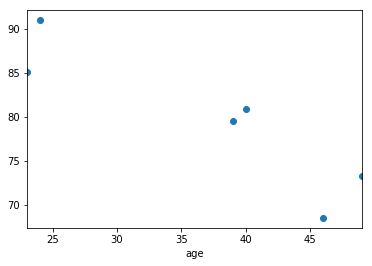

In [48]:
%matplotlib inline
df_tidy_1.groupby('age')['score'].mean().plot(marker='o',linestyle='')

For some applications this is fine. However, if I am interested in the sessions' scores, it is somewhat tedious to work with them. In a way, score on every task is actually a separate variable, because they are not directly comparable. Except for sessions' scores -- they are on the same task and they are directly comparable. How to organize this then? We could treat other scores, except for sessions, as separate variables, and keep scores for sessions and session # as another 2 variables, like so:

In [49]:
df_tidy_2 = pd.melt(df, id_vars=['age','gender','name','id','memory_matrix', 
                     'labyrinth', 'math_game', 'names_memory', 'survey_score'],
                    var_name='session',value_name='score')
df_tidy_2.sort_values('id')

,age,gender,name,id,memory_matrix,labyrinth,math_game,names_memory,survey_score,session,score
0,46,male,Charles Monroe,0,65.0,73.0,55.0,74.0,74.0,session_1,87.0
12,46,male,Charles Monroe,0,65.0,73.0,55.0,74.0,74.0,session_3,66.0
6,46,male,Charles Monroe,0,65.0,73.0,55.0,74.0,74.0,session_2,54.0
1,40,male,Mario Smith,1,92.0,87.0,83.0,77.0,94.0,session_1,71.0
13,40,male,Mario Smith,1,92.0,87.0,83.0,77.0,94.0,session_3,78.0
7,40,male,Mario Smith,1,92.0,87.0,83.0,77.0,94.0,session_2,65.0
14,39,male,Raul Cowett,2,71.0,96.0,85.0,71.0,80.0,session_3,73.0
8,39,male,Raul Cowett,2,71.0,96.0,85.0,71.0,80.0,session_2,99.0
2,39,male,Raul Cowett,2,71.0,96.0,85.0,71.0,80.0,session_1,61.0
9,23,female,Veronica Simmons,3,80.0,87.0,84.0,89.0,96.0,session_2,82.0


In [50]:
df_tidy_2.groupby('math_game')['score'].mean()

math_game
55.0    69.000000
59.0    69.000000
83.0    71.333333
84.0    81.666667
85.0    77.666667
96.0    86.000000
Name: score, dtype: float64

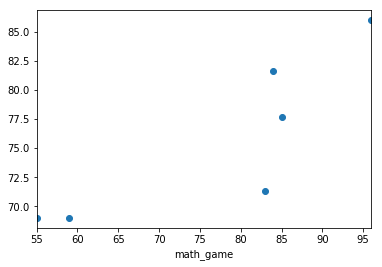

In [51]:
df_tidy_2.groupby('math_game')['score'].mean().plot(marker='o',linestyle='')

In [52]:
df_tidy_2.groupby(['name','score'])['survey_score'].mean()

name               score
Charles Monroe     54.0     74.0
                   66.0     74.0
                   87.0     74.0
Lillie Green       78.0     98.0
                   82.0     98.0
                   98.0     98.0
Marilyn Covington  56.0     60.0
                   63.0     60.0
                   88.0     60.0
Mario Smith        65.0     94.0
                   71.0     94.0
                   78.0     94.0
Raul Cowett        61.0     80.0
                   73.0     80.0
                   99.0     80.0
Veronica Simmons   78.0     96.0
                   82.0     96.0
                   85.0     96.0
Name: survey_score, dtype: float64

In [53]:
df_tidy_2.groupby(['name'])['score'].mean()

name
Charles Monroe       69.000000
Lillie Green         86.000000
Marilyn Covington    69.000000
Mario Smith          71.333333
Raul Cowett          77.666667
Veronica Simmons     81.666667
Name: score, dtype: float64

In [54]:
task_names[:-3]

['memory_matrix', 'labyrinth', 'math_game', 'names_memory', 'survey_score']

In [58]:
subj_df = df[['age','gender','name','id','memory_matrix', 'labyrinth', 
              'math_game', 'names_memory', 'survey_score']].set_index('id', drop='True')
subj_df

,age,gender,name,memory_matrix,labyrinth,math_game,names_memory,survey_score
id,,,,,,,,
0,46,male,Charles Monroe,65.0,73.0,55.0,74.0,74.0
1,40,male,Mario Smith,92.0,87.0,83.0,77.0,94.0
2,39,male,Raul Cowett,71.0,96.0,85.0,71.0,80.0
3,23,female,Veronica Simmons,80.0,87.0,84.0,89.0,96.0
4,24,female,Lillie Green,87.0,94.0,96.0,95.0,98.0
5,49,female,Marilyn Covington,93.0,98.0,59.0,69.0,60.0


In [59]:
scores_df = pd.melt(df[['id','session_1','session_2','session_3']],id_vars='id',var_name='session',value_name='score')
scores_df['session'].replace({s:int(s[-1]) for s in scores_df['session'].unique()}, inplace=True)
scores_df

,id,session,score
0,0,1,87.0
1,1,1,71.0
2,2,1,61.0
3,3,1,78.0
4,4,1,78.0
5,5,1,63.0
6,0,2,54.0
7,1,2,65.0
8,2,2,99.0
9,3,2,82.0


In [60]:
pd.merge(subj_df, scores_df, left_index=True, right_on='id')

,age,gender,name,memory_matrix,labyrinth,math_game,names_memory,survey_score,id,session,score
0,46,male,Charles Monroe,65.0,73.0,55.0,74.0,74.0,0,1,87.0
6,46,male,Charles Monroe,65.0,73.0,55.0,74.0,74.0,0,2,54.0
12,46,male,Charles Monroe,65.0,73.0,55.0,74.0,74.0,0,3,66.0
1,40,male,Mario Smith,92.0,87.0,83.0,77.0,94.0,1,1,71.0
7,40,male,Mario Smith,92.0,87.0,83.0,77.0,94.0,1,2,65.0
13,40,male,Mario Smith,92.0,87.0,83.0,77.0,94.0,1,3,78.0
2,39,male,Raul Cowett,71.0,96.0,85.0,71.0,80.0,2,1,61.0
8,39,male,Raul Cowett,71.0,96.0,85.0,71.0,80.0,2,2,99.0
14,39,male,Raul Cowett,71.0,96.0,85.0,71.0,80.0,2,3,73.0
3,23,female,Veronica Simmons,80.0,87.0,84.0,89.0,96.0,3,1,78.0


Now, let's get back to the billboard dataset, and tidy it in the same manner.

In [94]:
billboard_untidy.index.name = 'id'

songs_keys = billboard_untidy.keys()[:7]
songs_df = billboard_untidy[songs_keys]
songs_df.head()

,year,artist,track,time,genre,date.entered,date.peaked
id,,,,,,,
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14


In [90]:
rank_keys = billboard_untidy.keys()[7:]
rank_df = billboard_untidy[rank_keys]
rank_df.index.name = 'id'
rank_df = rank_df.reset_index()
rank_df = pd.melt(rank_df, id_vars='id', var_name = 'week', value_name = 'rank')
rank_df['week'].replace({s:keep_num(s) for s in rank_df['week']}, inplace=True)
rank_df.head(20)

,id,week,rank
0,0,1,78.0
1,1,1,15.0
2,2,1,71.0
3,3,1,41.0
4,4,1,57.0
5,5,1,59.0
6,6,1,83.0
7,7,1,63.0
8,8,1,77.0
9,9,1,81.0


In [91]:
rank_df.tail(20)

,id,week,rank
24072,297,76,NaN
24073,298,76,NaN
24074,299,76,NaN
24075,300,76,NaN
24076,301,76,NaN
24077,302,76,NaN
24078,303,76,NaN
24079,304,76,NaN
24080,305,76,NaN
24081,306,76,NaN


In [96]:
pd.merge(songs_df, rank_df, left_index=True, right_on='id').head()

,year,artist,track,time,genre,date.entered,date.peaked,id,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,1,78.0
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,2,63.0
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,3,49.0
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,4,33.0
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,5,23.0


In [97]:
pd.merge(songs_df, rank_df, left_index=True, right_on='id').shape

(24092, 10)

# Afterword

Tidy data is only worthwhile if it
makes analysis easier. **Tidy tools** take tidy datasets as input
and return tidy datasets as output. **Tidy tools** are useful because the output of one tool
can be used as the input to another. This allows you to simply and easily compose multiple
tools to solve a problem. Tidy data also ensures that variables are stored in a consistent,
explicit manner. This makes each tool simpler, because it does not need a Swiss Army knife
of parameters for dealing with different dataset structures.

Tools can be messy for two reasons: either they take messy datasets as input (**messy-input
tools**) or they produce messy datasets as output (**messy-output tools**). Messy-input tools are
typically more complicated than tidy-input tools because they need to include some parts of
the tidying process. This can be useful for common types of messy datasets, but it typically
makes the function more complex, harder to use and harder to maintain. Messy-output tools
are frustrating and slow down analysis because they cannot be easily composed and you must
constantly think about how to convert from one format to another.

We will see examples of messy tools and, more importantly, tidy tools in our future lessons.

# Possible exercises
These are some exercise drafts, some of them became of them will become real exercises, but I may not have thoroughly tested them yet. For example, they may require using somethig which we didn't learn in class. You can try them at your own risk, but it is likely that it is going to be quite difficult :) Try them only after you've studied other notebooks in this lesson (`002_data_organization`). For some exercises I provide my solutions below (they may not be well commented, because it is a draft).

**Exercise 1**: Find top 10 songs, which stayed in the chart for the longest duration (number of weeks). How long have they stayed? Find the song names. **Optional**: do it with the "tidyest" dataset, the one where information about songs and chart info are split into 2 dataframes.

# Solutions

**Exercise 1**

In [127]:
def how_many_nan(x):
    return np.sum(np.isnan(x))

top_durations = len(rank_df['week'].unique()) - rank_df.groupby('id')['rank'].agg(how_many_nan).sort_values().iloc[:10]
top_durations = pd.DataFrame(top_durations)
top_durations.rename(columns={'rank':'dur'}, inplace=True)
top_durations

,dur
id,
46,57.0
9,55.0
24,53.0
17,53.0
13,47.0
28,44.0
12,41.0
15,39.0
20,37.0


In [128]:
pd.merge(top_durations, songs_df, left_index=True, right_index=True)

,dur,year,artist,track,time,genre,date.entered,date.peaked
id,,,,,,,,
9,55.0,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04
12,41.0,2000,Vertical Horizon,Everything You Want,4:01,Rock,2000-01-22,2000-07-15
13,47.0,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11
15,39.0,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22
17,53.0,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22
20,37.0,2000,"Braxton, Toni",He Wasn't Man Enough,4:21,Rock,2000-03-18,2000-05-06
24,53.0,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11
28,44.0,2000,Joe,I Wanna Know,4:57,Rock,2000-01-01,2000-07-01
46,57.0,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22
